In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

df_exp = pd.read_csv(r"C:\Users\coys7\Apartments_prices\final_22")

df_exp=df_exp[df_exp.prices != 1365000000]
df_exp

,address,prices,Rooms,Square_in_m^2,Floor,Type,Year,District,Type_code,District_code
0,Аль-Фараби,70000000,3,91.8,8,монолитный дом,1990,Бостандыкский р-н,1,3
1,Шевченко 154 — Муканова,97000000,3,129.0,7,монолитный дом,2008,Алмалинский р-н,1,1
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1,кирпичный дом,1979,Алатауский р-н,0,0
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4,кирпичный дом,1968,Медеуский р-н,0,5
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2,кирпичный дом,1974,Турксибский р-н,0,7
...,...,...,...,...,...,...,...,...,...,...
14401,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5,монолитный дом,2013,Медеуский р-н,1,5
14402,Брусиловского 163,90000000,3,118.0,12,монолитный дом,2011,Алмалинский р-н,1,1
14403,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1,кирпичный дом,1966,Медеуский р-н,0,5
14404,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4,кирпичный дом,2018,Бостандыкский р-н,0,3


35000000     408
30000000     350
45000000     313
40000000     292
25000000     287
            ... 
51240000       1
255000000      1
50999999       1
24950000       1
13100000       1
Name: prices, Length: 1151, dtype: int64

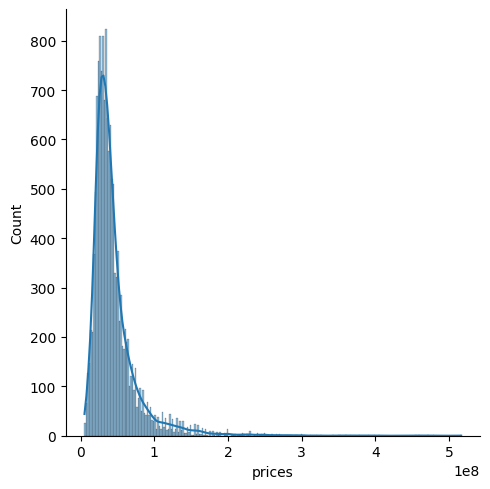

In [80]:
sns.displot(df_exp['prices'], kde=True)
df_exp['prices'].value_counts()

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

y = df_exp.prices

features = ['Rooms','Square_in_m^2','Floor', 'Type_code', 'Year', 'District_code']
x=df_exp[features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)


rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_x, train_y)
rf_prediction = rf_model.predict(val_x)

rf_val_mae = mean_absolute_error (rf_prediction, val_y)

print("MAE of Random Forest Regressor on test set: {:.3f}".format(rf_val_mae))

MAE of Random Forest Regressor on test set: 6830928.929


In [82]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(rf_prediction, val_y)
print("MSE Random Forest Regressor: {:.3f}".format(MSE))

RMSE = mean_squared_error(rf_prediction, val_y, squared=False)
print ("RMSE Random Forest Regressor: {:.3f}".format(RMSE))

MSE Random Forest Regressor: 187290152142195.094
RMSE Random Forest Regressor: 13685399.232


In [83]:
from sklearn.metrics import mean_squared_log_error
MSLE_rf = mean_squared_log_error(rf_prediction, val_y)
print("MSLE Random Forest Regressor: {:.4%}".format(MSLE_rf))

MSLE Random Forest Regressor: 3.5342%


In [84]:
# train_x.dtypes
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
xgb_prediction = xgb.predict(val_x)
xgb_val_mae = mean_absolute_error(xgb_prediction, val_y)
print("MAE XGBoost: {:.3f}".format(xgb_val_mae))
MSLE_xgb = mean_squared_log_error(xgb_prediction, val_y)
print("MSLE XGBoost: {:.4%}".format(MSLE_xgb))

MAE XGBoost: 6897116.523
MSLE XGBoost: 3.4852%


In [85]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_prediction = gnb.predict(val_x)
gnb_prediction_float = np.array(gnb_prediction, dtype=float)

gnb_val_mae = mean_absolute_error(gnb_prediction_float, val_y)
print("MAE Gaussian Naive Bayes: {:.3f}".format(gnb_val_mae))

MAE Gaussian Naive Bayes: 13287865.101


In [86]:
lr =LogisticRegression(max_iter = 1000)
lr.fit(train_x, train_y)
lr_prediction = lr.predict(val_x)
lr_prediction_float = np.array(lr_prediction, dtype=float)

lr_val_mae = mean_absolute_error(lr_prediction_float, val_y)
print("MAE Logistic Regression: {:.3f}".format(lr_val_mae))

MAE Logistic Regression: 10715838.304


c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(train_x,train_y)
dt_prediction = dt.predict(val_x)

dt_val_mae = mean_absolute_error(dt_prediction,val_y)
print("MAE Decision Tree Classifier: {:.3f}".format(dt_val_mae))

MAE Decision Tree Classifier: 8895616.919


In [88]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_prediction = knn.predict(val_x)

knn_val_mae = mean_absolute_error(knn_prediction, val_y)
print("MAE K-nearest Neighbors: {:.3f}".format(knn_val_mae))

MAE K-nearest Neighbors: 11270961.360


In [89]:
svc = SVC (probability=True)
svc.fit(train_x,train_y)
svc_prediction = svc.predict(val_x)
svc_prediction_float = np.array(svc_prediction, dtype=float)

svc_val_mae = mean_absolute_error(svc_prediction,val_y)
print("MAE Support Vector Classification: {:.3f}".format(svc_val_mae))

MAE Support Vector Classification: 19182499.519


In [90]:
models = ["Random Forest Regressor", "XGBoost", "Gaussian Naive Bayes", "Logistic Regression", "Decision Tree Regressor", "K-nearest Neighbors", "Support Vector"]
tests_mae =[rf_val_mae, xgb_val_mae, gnb_val_mae, lr_val_mae, dt_val_mae, knn_val_mae, svc_val_mae]
compare_models = pd.DataFrame({"Algorithms": models, "MAE": tests_mae})
compare_models.sort_values(by = "MAE", ascending=True)

,Algorithms,MAE
0,Random Forest Regressor,6.830929e+06
1,XGBoost,6.897117e+06
4,Decision Tree Regressor,8.895617e+06
3,Logistic Regression,1.071584e+07
5,K-nearest Neighbors,1.127096e+07
2,Gaussian Naive Bayes,1.328787e+07
6,Support Vector,1.918250e+07


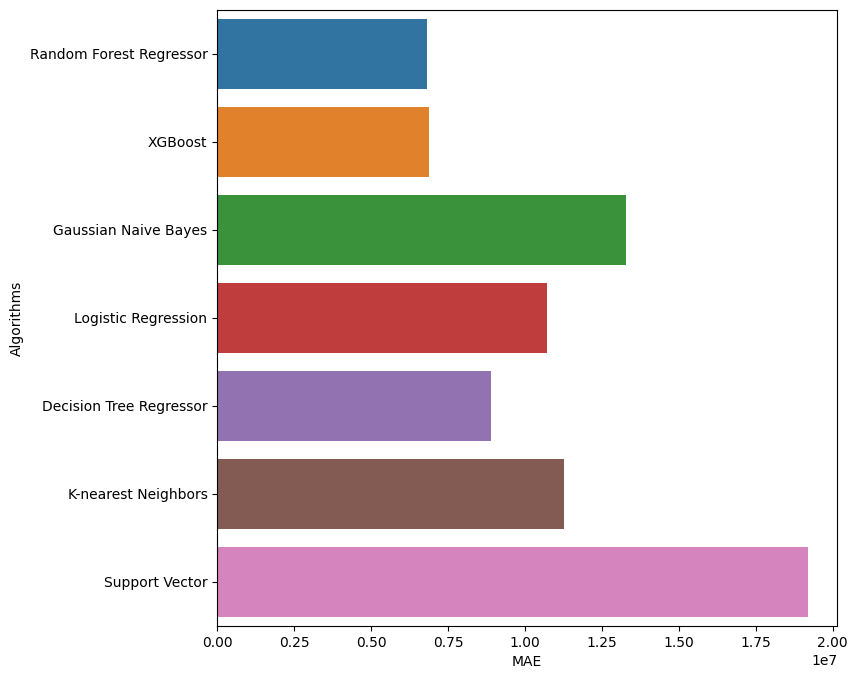

In [91]:
import matplotlib.pyplot as plt
plt.figure (figsize =(8,8))
sns.barplot(x = "MAE", y = "Algorithms", data = compare_models)
plt.show()

In [92]:
from sklearn.metrics import r2_score
score = r2_score(rf_prediction, val_y)
print (score)


0.8243175849742121


In [93]:
val_y1=val_y.copy()
gross =[]
for i in rf_prediction:
    gross.append(i)
df=pd.DataFrame(data=gross)
df = df.set_index(val_y.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1=pd.concat([val_y1, df], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
8254,30000000,2.834792e+07
3683,33500000,3.743017e+07
11557,22000000,2.422933e+07
10539,18000000,2.134933e+07
6461,59000000,5.656994e+07


In [94]:
df1['diff'] = df1['predicted'] - df1['true']
pd.DataFrame({'Count':[(df1['diff']<0).sum(),(df1['diff']==0).sum(),(df1['diff']>0).sum()]},columns=["Count"], index = ['Underestimation', 'Exact Estimation', 'Overestimation'])


,Count
Underestimation,1632
Exact Estimation,0
Overestimation,1970


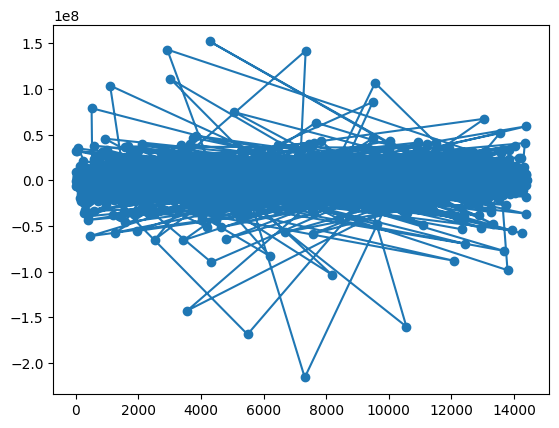

In [98]:
plt.plot('diff', data=df1, linestyle='-', marker='o')
plt.show()

In [96]:
df1.sort_values(by = "diff", ascending=True)

,true,predicted,diff
7315,399500000,1.837386e+08,-2.157614e+08
5488,350000000,1.814154e+08,-1.685846e+08
10560,480000000,3.199261e+08,-1.600739e+08
3558,365920000,2.232361e+08,-1.426839e+08
8175,472000000,3.689106e+08,-1.030894e+08
...,...,...,...
9562,83000000,1.896408e+08,1.066408e+08
3025,220000000,3.310766e+08,1.110766e+08
7345,215000000,3.569449e+08,1.419449e+08
2923,81000000,2.242160e+08,1.432160e+08


<Axes: xlabel='diff', ylabel='true'>

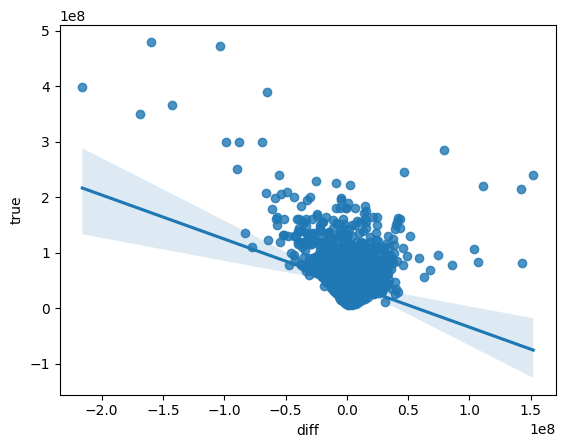

In [101]:
sns.regplot(x=df1['diff'], y=df1['true'])

In [106]:
df_merged=val_x.join(df1)
df_merged

,Rooms,Square_in_m^2,Floor,Type_code,Year,District_code,true,predicted,diff
8254,1,50.0,6,1,2010,0,30000000,2.834792e+07,-1.652083e+06
3683,3,59.0,4,2,1969,1,33500000,3.743017e+07,3.930167e+06
11557,1,33.0,6,1,2022,1,22000000,2.422933e+07,2.229333e+06
10539,1,34.5,5,1,2023,6,18000000,2.134933e+07,3.349329e+06
6461,2,78.9,7,1,2023,2,59000000,5.656994e+07,-2.430060e+06
...,...,...,...,...,...,...,...,...,...
6530,2,44.0,3,2,1975,5,38000000,3.358200e+07,-4.418000e+06
8257,1,20.0,3,0,1976,1,20000000,1.481930e+07,-5.180700e+06
10279,2,84.0,8,1,2014,3,101000000,9.045000e+07,-1.055000e+07
5915,2,48.4,12,1,2023,3,35500000,3.991167e+07,4.411666e+06


<Axes: xlabel='diff', ylabel='Square_in_m^2'>

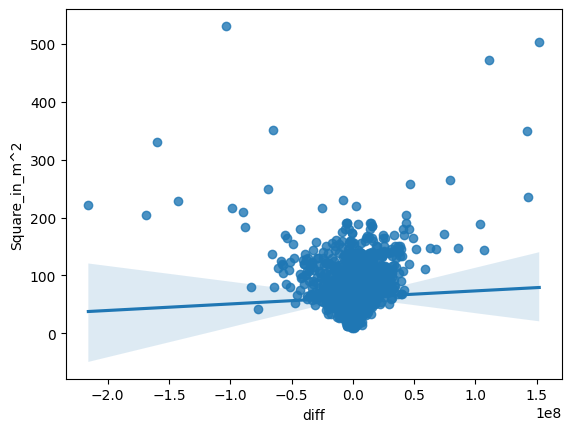

In [108]:
sns.regplot(x=df_merged['diff'], y=df_merged['Square_in_m^2'])